# CRSP and Compustat Summary

In [1]:
import sys
sys.path.insert(0, "./src")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import chartbook

BASE_DIR = chartbook.env.get_project_root()
DATA_DIR = BASE_DIR / "_data"

## Data Overview

This pipeline produces CRSP stock returns and Fama-French factor data:
- Individual stock monthly returns (with and without dividends)
- Fama-French SMB and HML factors (replicated from CRSP/Compustat)

### Data Sources

- CRSP Monthly Stock File (CIZ format)
- Compustat Fundamentals Annual
- CRSP-Compustat Link Table

## CRSP Monthly Stock Returns

In [2]:
df_ret = pd.read_parquet(DATA_DIR / "ftsfr_CRSP_monthly_stock_ret.parquet")
print(f"Shape: {df_ret.shape}")
print(f"Columns: {df_ret.columns.tolist()}")
print(f"\nDate range: {df_ret['ds'].min()} to {df_ret['ds'].max()}")
print(f"Number of unique stocks: {df_ret['unique_id'].nunique()}")

Shape: (3810519, 3)
Columns: ['unique_id', 'ds', 'y']

Date range: 1926-01-30 00:00:00 to 2024-12-31 00:00:00
Number of unique stocks: 26757


In [3]:
df_ret.describe()

,unique_id,ds,y
count,3.810519e+06,3810519,3810519.0
mean,4.967281e+04,1990-05-13 12:18:53.556452608,0.011038
min,1.000000e+04,1926-01-30 00:00:00,-1.0
25%,2.088800e+04,1978-04-28 00:00:00,-0.065354
50%,4.819500e+04,1992-09-30 00:00:00,0.0
75%,7.884100e+04,2005-03-31 00:00:00,0.069824
max,9.343600e+04,2024-12-31 00:00:00,26.583827
std,2.845362e+04,NaN,0.184368


## Fama-French Factors (Replicated)

Shape: (762, 3)
Columns: ['date', 'SMB', 'HML']

Date range: 1961-07-31 00:00:00 to 2024-12-31 00:00:00

Summary Statistics:
sbport         SMB         HML
count   750.000000  750.000000
mean      0.001812    0.002303
std       0.030005    0.030226
min      -0.169237   -0.135843
25%      -0.016169   -0.014193
50%       0.000754    0.001639
75%       0.018759    0.016882
max       0.221418    0.136524


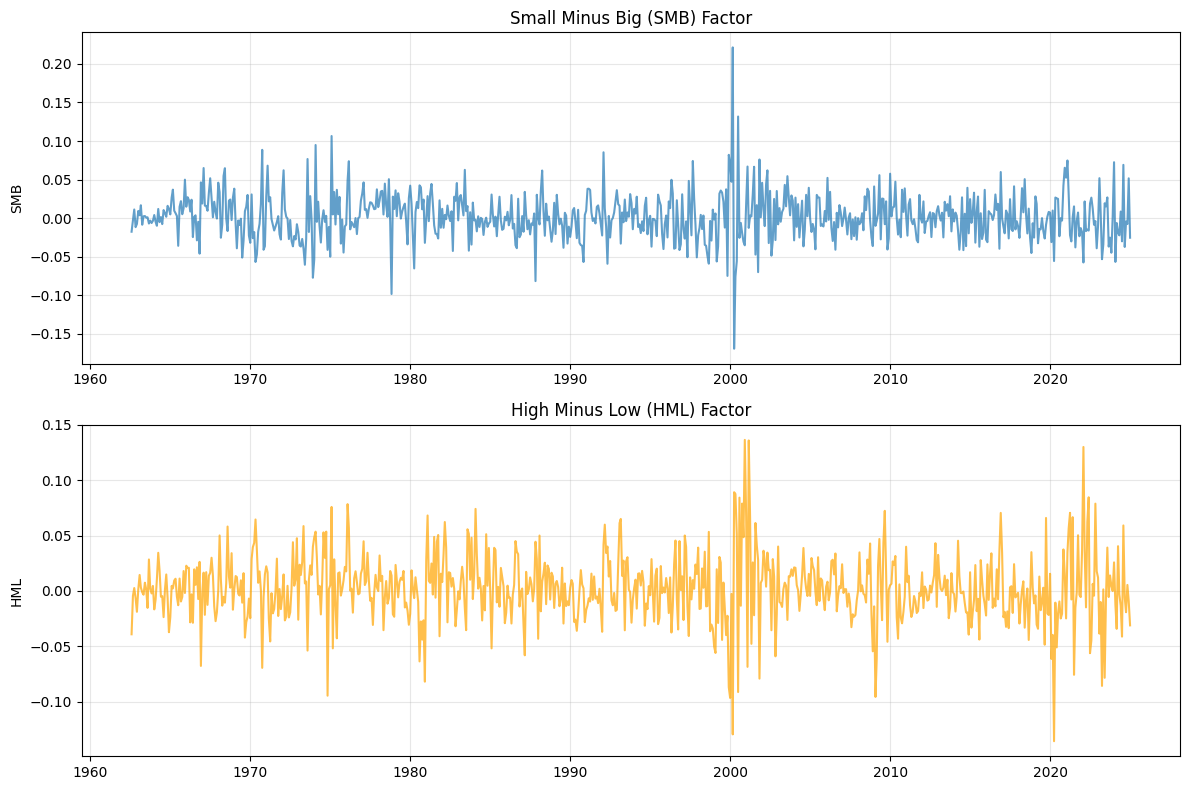

In [4]:
try:
    df_ff = pd.read_parquet(DATA_DIR / "FF_1993_factors.parquet")
    print(f"Shape: {df_ff.shape}")
    print(f"Columns: {df_ff.columns.tolist()}")
    print(f"\nDate range: {df_ff['date'].min()} to {df_ff['date'].max()}")

    # Summary statistics
    print("\nSummary Statistics:")
    print(df_ff[["SMB", "HML"]].describe())

    # Time series plot
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))

    axes[0].plot(df_ff["date"], df_ff["SMB"], label="SMB", alpha=0.7)
    axes[0].set_ylabel("SMB")
    axes[0].set_title("Small Minus Big (SMB) Factor")
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(df_ff["date"], df_ff["HML"], label="HML", color="orange", alpha=0.7)
    axes[1].set_ylabel("HML")
    axes[1].set_title("High Minus Low (HML) Factor")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
except FileNotFoundError:
    print("Fama-French factors file not found")

## Return Distribution Over Time

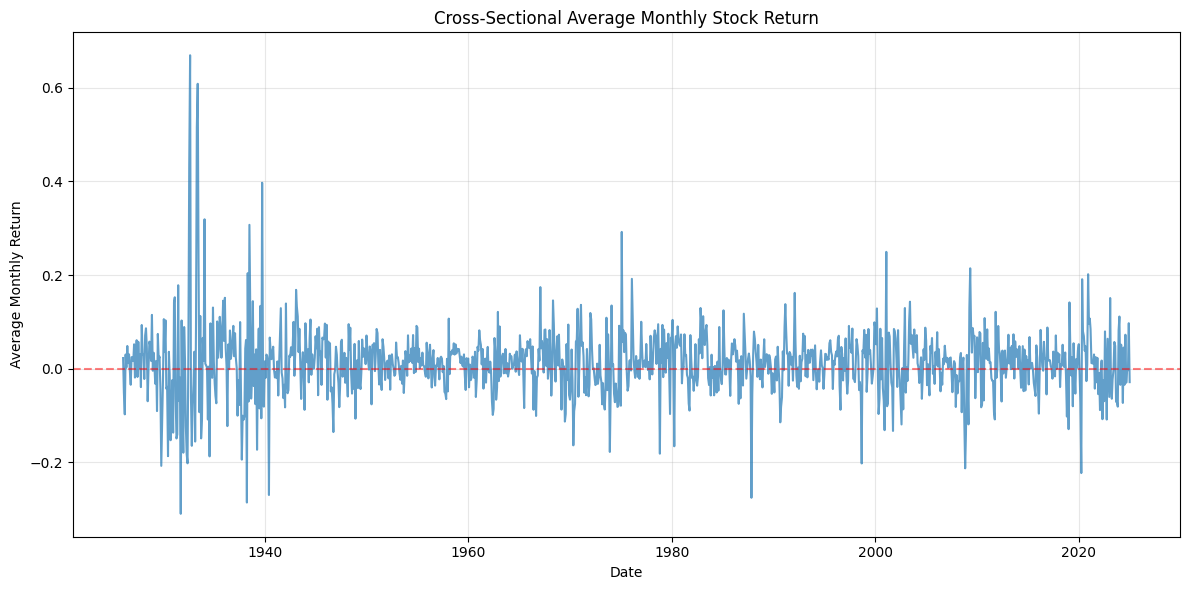

In [5]:
# Monthly average return
monthly_avg = df_ret.groupby("ds")["y"].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_avg["ds"], monthly_avg["y"], alpha=0.7)
ax.set_xlabel("Date")
ax.set_ylabel("Average Monthly Return")
ax.set_title("Cross-Sectional Average Monthly Stock Return")
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Number of Stocks Over Time

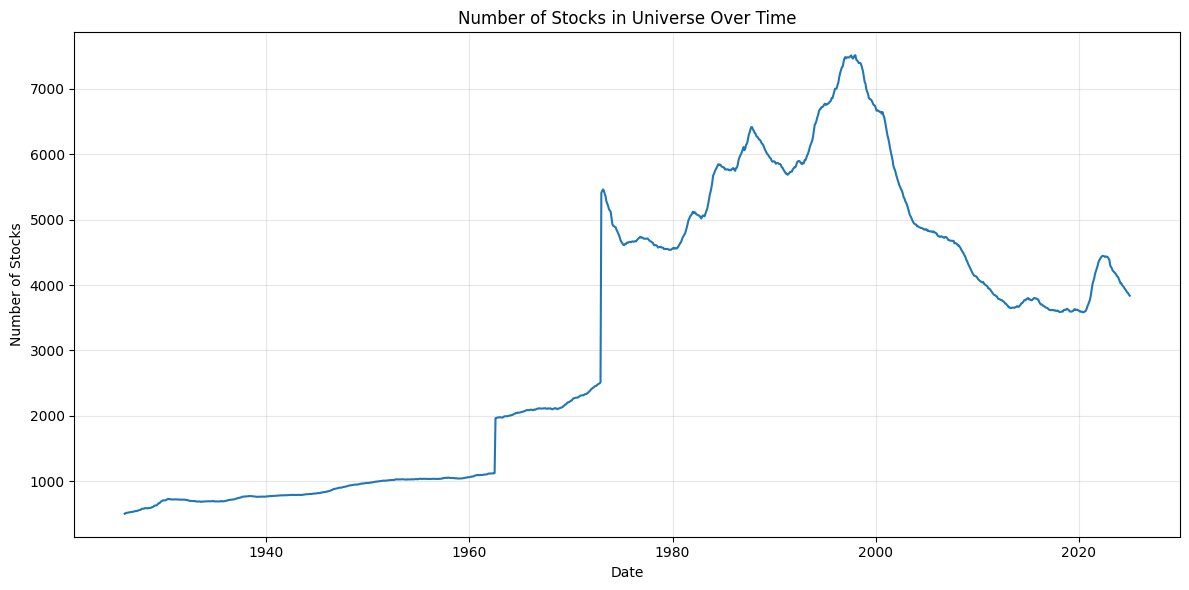

In [6]:
stock_count = df_ret.groupby("ds")["unique_id"].nunique().reset_index()
stock_count.columns = ["date", "n_stocks"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(stock_count["date"], stock_count["n_stocks"])
ax.set_xlabel("Date")
ax.set_ylabel("Number of Stocks")
ax.set_title("Number of Stocks in Universe Over Time")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Data Definitions

### CRSP Stock Returns

| Variable | Description |
|----------|-------------|
| unique_id | CRSP PERMNO (permanent security identifier) |
| ds | Month-end date |
| y | Monthly return (including dividends) |

### Fama-French Factors

| Factor | Description |
|--------|-------------|
| SMB | Small Minus Big - Size factor |
| HML | High Minus Low - Value factor |

Factors are constructed following Fama-French (1993) methodology using NYSE breakpoints.